In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR


In [7]:
data = pd.read_csv("abalone.csv")

In [8]:
data['age'] = data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)

Univariate analysis

In [9]:
print('This dataset has {} observations with {} features.'.format(data.shape[0], data.shape[1]))

This dataset has 4177 observations with 9 features.


In [10]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

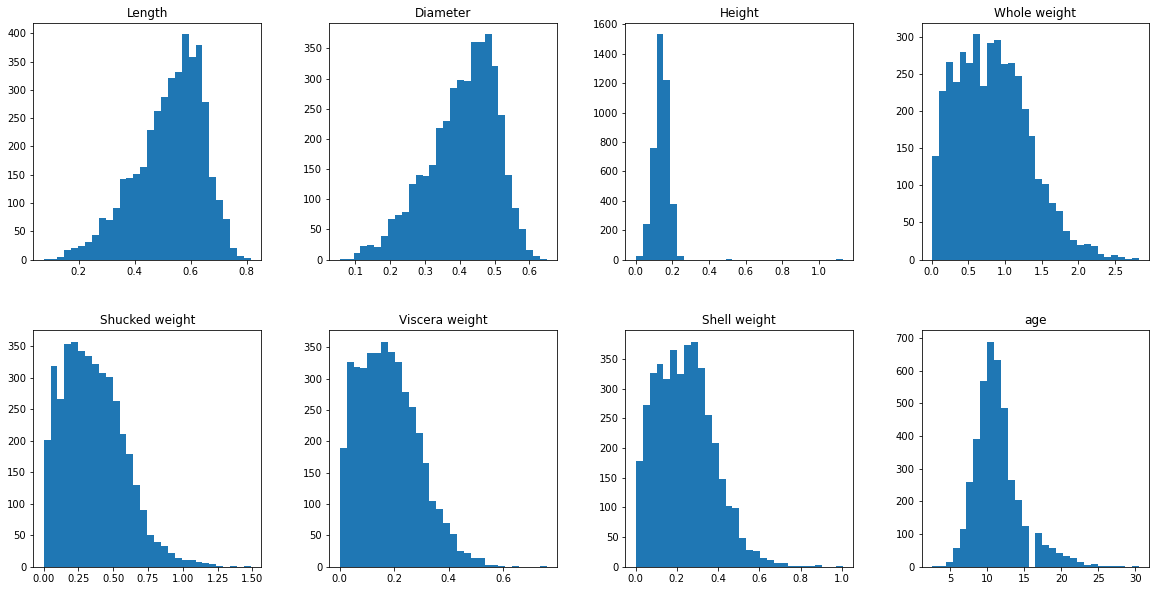

In [11]:
data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [12]:
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns

C:\Users\admin\AppData\Local\Temp\ipykernel_8736\2424602695.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = data.select_dtypes(include=[np.object]).columns


In [13]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [14]:
categorical_features

Index(['Sex'], dtype='object')

In [15]:
skew_values = skew(data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


In [16]:
# Missing values
missing_values = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0
Viscera weight,0,0.0
Shell weight,0,0.0
age,0,0.0


<AxesSubplot:xlabel='Sex', ylabel='count'>

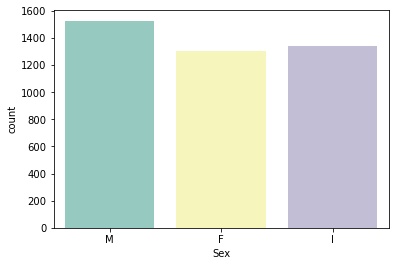

In [17]:
sns.countplot(x = 'Sex', data = data, palette="Set3")

In [ ]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = data, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age', data = data)

In [ ]:
data.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age']].mean().sort_values('age')

Bivariate Analysis

In [ ]:
sns.pairplot(data[numerical_features])

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(data[numerical_features].corr(), annot=True)

Outliers handlings

In [ ]:
data = pd.get_dummies(data)
dummy_data = data.copy()

In [ ]:
data.boxplot( rot = 90, figsize=(20,5))

In [ ]:
var = 'Viscera weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Shell weight']> 0.6) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Shell weight']<0.8) & (data['age'] > 25)].index, inplace=True)

In [ ]:
var = 'Shucked weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Whole weight']>= 2.5) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Whole weight']<2.5) & (data['age'] > 25)].index, inplace=True)

In [ ]:
var = 'Diameter'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Diameter']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Diameter']<0.6) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Diameter']>=0.6) & (data['age']< 25)].index, inplace=True)

In [ ]:
var = 'Height'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Height']>0.4) & (data['age'] < 15)].index, inplace=True)
data.drop(data[(data['Height']<0.4) & (data['age'] > 25)].index, inplace=True)

In [ ]:
var = 'Length'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [ ]:
data.drop(data[(data['Length']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Length']<0.8) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Length']>=0.8) & (data['age']< 25)].index, inplace=True)

Preprocessing, Modeling, Evaluation

In [ ]:
X = data.drop('age', axis = 1)
y = data['age']

In [ ]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

In [ ]:
np.random.seed(10)
def rmse_cv(model, X_train, y):
    rmse =- (cross_val_score(model, X_train, y, scoring='neg_mean_squared_error', cv=5))
    return(rmse*100)

models = [LinearRegression(),
             Ridge(),
             SVR(),
             RandomForestRegressor(),
             GradientBoostingRegressor(),
             KNeighborsRegressor(n_neighbors = 4),]

names = ['LR','Ridge','svm','GNB','RF','GB','KNN']

for model,name in zip(models,names):
    score = rmse_cv(model,X_train,y_train)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

In [ ]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['age'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = -cross_val_score(alg, dtrain[predictors], dtrain['age'], cv=cv_folds, 
                                                    scoring='r2')
    
    #Print model report:
    print ("\nModel Report")
    print( "RMSE : %.4g" % mean_squared_error(dtrain['age'].values, dtrain_predictions))
    print( "R2 Score (Train): %f" % r2_score(dtrain['age'], dtrain_predictions))
    
    if performCV:
        print( "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),
                                                                                 np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.coef_, predictors).sort_values(ascending=False)
        plt.figure(figsize=(20,4))
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [ ]:
# Base Model
predictors = [x for x in data.columns if x not in ['age']]
lrm0 = Ridge(random_state=10)
modelfit(lrm0, data, predictors)

Hyperparameter tunning using GrideSearchCV

In [ ]:
# Let's do hyperparameter tunning using GrideSearchCV
from sklearn.model_selection import  GridSearchCV
param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
glrm0 = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
glrm0.fit(X_train, y_train)
glrm0.best_params_, glrm0.best_score_

In [ ]:
modelfit(Ridge(alpha = 0.1,random_state=10,), data, predictors)